## Gerekli Kütüphaneleri İçe Aktaralım.

In [ ]:
print('IMPORTING ALL THE NECESSARY LIBRARIES...')
from tensorflow.python import keras
from keras.models import Sequential, model_from_json
from keras.layers import Dense
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.optimizers import RMSprop

IMPORTING ALL THE NECESSARY LIBRARIES...


## Eğitmek ve Test Etmek İçin Kullanacağımız Datamızı Yükleyelim.


In [ ]:
print('----------------------------------------------------------------')
print('OPENING FILES FROM SYSTEM DATA...')
file = open('/nn_weights.csv', 'r')
df = pd.read_csv(file)


----------------------------------------------------------------
OPENING FILES FROM SYSTEM DATA...


Datamıza küçük bir bakış atalım.

In [ ]:
df.head(50)

,Unnamed: 0,index,yurtici_deci,altinkaya_cikis_deci,calculated_deci,total_weight_gr,total_volume_cm3
0,0,2,840,834.0,938.400,88325.0,281520.000
1,1,20,143,143.0,80.800,53750.0,242400.000
2,2,33,106,92.0,17.300,65000.0,112004.000
3,3,35,94,100.0,21.935,37076.0,65806.320
4,4,42,24,24.0,2.592,3000.0,7776.000
5,5,49,1,1.0,0.121,140.0,362.880
6,6,51,30,30.0,0.188,433.0,563.040
7,7,54,7,7.0,0.323,987.5,969.650
8,8,56,6,6.0,0.183,162.0,550.000
9,9,58,4,4.0,0.063,155.0,188.600


## Veri düzenleme

Daha iyi bi analiz için verimizi görselleştirelim.

Verimizdeki aykırı değerleri ne kadar temizlersek o kadar iyi sonuç çıkar. Unutmayın sinir ağları karmaşık yapılardır ve siz ona istenilen sonuca nasıl gideceğini söylemezsiniz. Bağlantı kuracağı datayı(Train Data) ve sonuç olarak ulaşmak istediği yeri(Test Data) söylersiniz ve istatistiksel hata azaltma algoritmalarıyla gerekli tahmin için en iyi fonksiyonu kendisi oluşturur.

Bi bağlamda kendi hipotezini kendi başına itere ederek(tekrarlayarak) değiştirir gibi düşünebilirsiniz. 

O yüzden bir modelin başarısını belirleyen en önemli etmen iyi düzenlenmiş ve hatalarından ayıklanmış data vermektir.

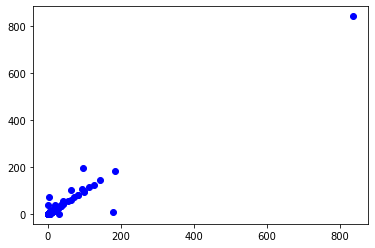

In [ ]:
plt.scatter(df['altinkaya_cikis_deci'], df['yurtici_deci'],
            color='blue')
plt.show()

Yeni veri çerçeveleri oluşturalım. Gerekli manipülasyonların yapılması için raw,
modele sunmak için test ve train.


In [ ]:
print('----------------------------------------------------------------')
print('CREATING NEW DATA FRAMES FOR TRAINING AND TESTING THE MODEL...')
raw_train_data = pd.DataFrame()  # Creating a new dataframe
test_data = pd.DataFrame()
train_data = pd.DataFrame()


----------------------------------------------------------------
CREATING NEW DATA FRAMES FOR TRAINING AND TESTING THE MODEL...
----------------------------------------------------------------
PROCESSING NECESSARY MODIFICATIONS ON DATA...


,calculated_deci,total_weight_gr,total_volume_cm3
36,0.312,220.0,937.440
37,67.069,32040.0,201208.352
38,0.391,2750.0,1171.800
39,0.495,390.0,1485.000
40,9.405,8065.0,28215.000
41,0.869,379.0,2605.680
42,54.172,29000.0,162516.200
43,2.622,1090.0,7866.000
44,0.741,495.0,2223.010
45,0.883,934.4,2649.600


Datamızdaki bilgi eksik olan satırları filtreleyelim.

In [ ]:
print('----------------------------------------------------------------')
print('PROCESSING NECESSARY MODIFICATIONS ON DATA...')
raw_train_data = df.loc[df['total_volume_cm3'] != 0.00]  # Select the data with total volume input
raw_train_data = raw_train_data.loc[df['yurtici_deci'] != 0.0]          # Data with yurtici desi



----------------------------------------------------------------
PROCESSING NECESSARY MODIFICATIONS ON DATA...


# Aykırı değerleri atalım, train ve test data oluşturalım


Tabii ki bu geçici bi çözüm, otonomlaştırılabilir.

In [ ]:
raw_train_data = raw_train_data.drop(2)
raw_train_data.drop('index', axis='columns')
## Finally define train and test data

test_data = raw_train_data['yurtici_deci'].copy()
train_data = raw_train_data[['calculated_deci', 'total_weight_gr', 'total_volume_cm3']].copy()
# train_data.fillna(0)


İhtiyaç olursa indexleri sıfırlamak için fonksiyon yazıp kullanabiliriz.

In [ ]:
# print('----------------------------------------------------------------')
# print('RESETTING INDEXES...')
# ## Resetting index
# def reset_dataframe_index(dataframe):
#   dataframe = dataframe.reset_index()
#   
# reset_dataframe_index(train_data)
# reset_dataframe_index(test_data)

Eğer tensorflow hazır modellerini kullanmasaydım, manuel makine öğrenimi algoritmalarını yazmak için satır ve kolon sayısına ihtiyacımız olabilirdi.


In [ ]:
## Counting rows and columns for creating tensor
# row = len(train_data)
# columns = train_data.count(axis='columns')[x] # X yerine herhangi bir mevcut satır numarası girilebilir.


0      3
1      3
3      3
4      3
5      3
      ..
153    3
154    3
155    3
156    3
157    3
Length: 157, dtype: int64

# Veri düzenleme için pandas kütüphanesini kullandım, verimi tensor haline getirebilmek için önce array olması gerekiyor

In [ ]:
from pandas.core.frame import DataFrame
print('----------------------------------------------------------------')
print('CONVERTING DATAFRAMES TO NUMPY ARRAYS...')
## Converting my pandas dataframes to numpy arrays.

def turn_numpy_arrays(dataframe):
  try:
    dataframe = dataframe.to_numpy()
    return DataFrame
  except AttributeError:
    pass

turn_numpy_arrays(train_data)
turn_numpy_arrays(test_data)


----------------------------------------------------------------
CONVERTING DATAFRAMES TO NUMPY ARRAYS...


pandas.core.frame.DataFrame

#Son olarak arraylerimizi tensor haline getirelim.

Sinir ağı algoritmaları veriyi kabul etmek için 3 boyutlu tensor adı verilen data modelleri oluşturmamızı zorunlu tutar.

In [ ]:
print('----------------------------------------------------------------')
print('CREATING TENSORS FOR FINAL VERSION...')
def create_tensor(array):
  array = tf.convert_to_tensor(array, dtype=tf.float32)

create_tensor(train_data)
create_tensor(test_data)


----------------------------------------------------------------
CREATING TENSORS FOR FINAL VERSION...


## Temel bir sinir ağı modeli oluşturalım. Gerekli istatistik algoritmalarını belirleyelim.


Algoritmaların nasıl çalıştığına ve neden bunları seçtiğimin ayrıntısına girmeyeceğim. Sorularınız veya önerileriniz için linkedinden ulaşabilirsiniz.

In [ ]:
print('----------------------------------------------------------------')
print('----------------------------------------------------------------')
print('CREATING BASELINE NEURAL NETWORK MODEL...')


# Create model and add layers
model = Sequential()
  
model.add(Dense(3, input_shape=(3,), kernel_initializer='normal',activation='relu'))
model.add(Dense(20, input_shape=(3,), kernel_initializer='normal', activation='relu'))
model.add(Dense(1))

opt = RMSprop(learning_rate=0.0002)
# Compile model
model.compile(optimizer=opt, loss="mean_squared_error")
  
  


----------------------------------------------------------------
----------------------------------------------------------------
CREATING BASELINE NEURAL NETWORK MODEL...


## Modeli eğitmenin vakti geldi

Fit methodu ile elimdeki train ve test datasını modele verdim, verboseyi true haline getirdim ki sonucu görebilelim.

Normal şartlarda modelim böyle değil, train datamın satırları bu şekilde değil. Feature dediğimiz sinir ağı modelinin bakarak bağlantılar kuracağı, sonucu çıkarmak için kendinde gerekli değişikleri yapacağı özellikler bu şekilde değil

Şirket içi sipariş bilgilerini burada yayınlamak şirket tarafından böyle bi istek olmasa da etik değerlerime uymadı. Uydurmaca bi data oluşturdum ama genel olarak ortalama bi neural network modelinin nasıl oluşturulduğunu artık biliyorsunuz. 

Normal şartlarda yazdığım programda hangi üründen kaç tane sipariş edildiğinin verisini giriyorsunuz ve otomatik o ürünün en boy yüksekliğini veritabanından alıp sipariş sayısıyla çarpıyor. Sonra o değer sinir ağına girip paketlendikten sonraki tahmini değeri veriyor. 

Örnek olarak burada verdiğim data eksik hatalı ve model için uygun değil. Loss fonksiyon sonucunun bu kadar yüksek olmasının sebebi bu.

In [ ]:
print('----------------------------------------------------------------')
print('----------------------------------------------------------------')
print('EVALUATING MODEL...')
    
history = model.fit(train_data, test_data, epochs=100, batch_size=4, verbose=1)



scores = model.evaluate(train_data, test_data, verbose=1)
    
try:
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1] * 100))
except IndexError:
    pass    


----------------------------------------------------------------
----------------------------------------------------------------
EVALUATING MODEL...
Epoch 1/100
40/40 [==============================] - 1s 1ms/step - loss: 24422.8301
Epoch 2/100
40/40 [==============================] - 0s 2ms/step - loss: 23480.5742
Epoch 3/100
40/40 [==============================] - 0s 2ms/step - loss: 22769.5293
Epoch 4/100
40/40 [==============================] - 0s 2ms/step - loss: 21907.1406
Epoch 5/100
40/40 [==============================] - 0s 2ms/step - loss: 21262.2832
Epoch 6/100
40/40 [==============================] - 0s 2ms/step - loss: 20512.2578
Epoch 7/100
40/40 [==============================] - 0s 2ms/step - loss: 19599.2090
Epoch 8/100
40/40 [==============================] - 0s 2ms/step - loss: 18935.1367
Epoch 9/100
40/40 [==============================] - 0s 2ms/step - loss: 18374.5332
Epoch 10/100
40/40 [==============================] - 0s 2ms/step - loss: 17618.0879
Epoch 11/

In [ ]:
print(history.history.keys())

dict_keys(['loss'])


## Her bir adımın geçmişini görselleştirerek modelinizi doğru eğitip eğitmediğinize dair çıkarımlar yapabilirsiniz.

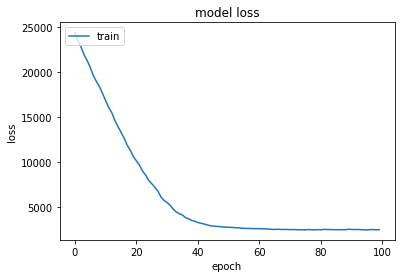

In [ ]:

def plot_history(history, key):
    plt.plot(history.history['loss'])
    
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
  
  
  
# Plot the history
plot_history(history, 'mean_absolute_percentage_error')

## Her tahmin için tekrardan modeli eğitmenize gerek yok. Eğitilmiş parametreleri ve modeli kaydedip tekrar eğitmeden tahminde bulundurabilirsiniz.

Oluşturulan modeli JSON dosyası olarak kaydetme.

In [ ]:
def save_model_as_json(model_input):
    """Saves model named object in the script to default location. You can change that if you want."""
    model_json = model_input.to_json()
    with open("model.json", "w") as json_file:
        json_file.write(model_json)

save_model_as_json(model)


Eğitilmiş modelin parametrelerini H5 dosyası olarak kaydetme.

In [ ]:
def save_weights_as_h5(model_input):
    """Saves network's weights(inputs) to default location as .h5 file. """
    model_input.save_weights("model.h5")
    print("Saved model to disk.")

save_weights_as_h5(model)

Saved model to disk.


## Tekrar kullanım için modeli kaydedilen patikadan geri yükleme.

In [ ]:
def load_neural_network_model_from_path(json_file_path):
    """Loads neural network and weights from the given file paths """

    json_file = open(json_file_path, "r")
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)

    print("Loaded model from disk.")
    return loaded_model

## Düz modelin üstüne önceden eğitilmiş parametreleri yükleme.

In [ ]:
def load_h5_weights_file_to_model(model, h5_path):
    """Returns model with weights from given path."""
    model.load_weights(h5_path)
    print("Loaded weights from disk.")
    return model

## Eğitilmiş model üzerinde tahminler yapabilirsiniz. Son kullanıcıyı ilgilendiren kısım burasıdır genelde. Siz ona elinizdeki verileri verirsiniz, o eğittiği hipoteze göre tahminde bulunur.

In [ ]:
def predict_model(model, calculated_deci, total_volume_cm3, total_weight_gram):
    numpy_obj = np.array([calculated_deci, total_volume_cm3, total_weight_gram], ndmin=2)
    # numpy_obj = tf.convert_to_tensor(numpy_obj, dtype=tf.float32)
    # prediction = np.argmax(my_model.predict(numpy_obj), axis=-1)
    prediction = model.predict(numpy_obj)
    print(prediction)

predict_model(model, 2.622, 1090.0, 7866.000)

[[3.8347352]]
